### Step 1. Reading DATA

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:

# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r"C:\Users\onkar.darekar\OneDrive - UGRO Capital\Course material\Assignments'\House Price Prediction\train.csv", encoding = 'latin')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2:EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

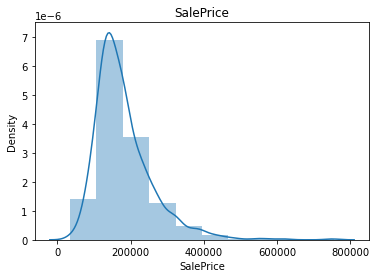

In [9]:
# Plottin Y Variable = 'SalePrice'
plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

In [10]:
# Percentage of missing Values above 50%
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data = missing_data[missing_data['Missing Ratio']>50]
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425


In [11]:
# Remove data with more than 50% data missing
df.drop(columns=list(missing_data.index), axis=1, inplace=True)
     

In [12]:
df.shape

(1460, 77)

In [13]:
# Checking for Skewed Data by 85% and makes the feature highly unbalanced
cat_col = df.select_dtypes(include=['object'])
column_skewed = []
for col in (cat_col):
  if(df[col].value_counts().max() >= 1241):
      column_skewed.append(col)
column_skewed

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [14]:
# Dropping the data with high skewness(bias towards one type)
df.drop(columns=column_skewed, axis=1, inplace=True)

In [15]:
# Dropping Id since it does not give any inputs
df.drop(columns=['Id'], axis=1, inplace=True)

### Step 3: Feature Engineering : Deriving new features from existing features

In [16]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64


In [17]:
# Columns with Years
df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']]
     

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,2003,2003,2008,2003.0
1,1976,1976,2007,1976.0
2,2001,2002,2008,2001.0
3,1915,1970,2006,1998.0
4,2000,2000,2008,2000.0
...,...,...,...,...
1455,1999,2000,2007,1999.0
1456,1978,1988,2010,1978.0
1457,1941,2006,2010,1941.0
1458,1950,1996,2010,1950.0


In [18]:
df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']].describe()    

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1379.000000
mean,1971.267808,1984.865753,2007.815753,1978.506164
std,30.202904,20.645407,1.328095,24.689725
min,1872.000000,1950.000000,2006.000000,1900.000000
25%,1954.000000,1967.000000,2007.000000,1961.000000
50%,1973.000000,1994.000000,2008.000000,1980.000000
75%,2000.000000,2004.000000,2009.000000,2002.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [19]:
#Calculate the Age of House
def get_age(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['Age_House'] = df.apply(get_age, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Age_House
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,2,2008,Normal,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,5,2007,Normal,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,9,2008,Normal,223500,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,272,0,0,0,0,2,2006,Abnorml,140000,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,12,2008,Normal,250000,8


In [20]:
# Binary Classification of Old or New Garage
def construction_of_garage(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['Garage_old_new'] = df['GarageYrBlt'].apply(construction_of_garage)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Age_House,Garage_old_new
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,2,2008,Normal,208500,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,5,2007,Normal,181500,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,9,2008,Normal,223500,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,2,2006,Abnorml,140000,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,12,2008,Normal,250000,8,1


In [21]:
# We can drop base features
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [22]:
# Impute the null values with median values for missing columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [23]:
percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

MSSubClass         0.00
MSZoning           0.00
LotFrontage        0.00
LotArea            0.00
LotShape           0.00
LotConfig          0.00
Neighborhood       0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
RoofStyle          0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.55
MasVnrArea         0.00
ExterQual          0.00
Foundation         0.00
BsmtQual           2.53
BsmtExposure       2.60
BsmtFinType1       2.53
BsmtFinSF1         0.00
BsmtFinSF2         0.00
BsmtUnfSF          0.00
TotalBsmtSF        0.00
HeatingQC          0.00
1stFlrSF           0.00
2ndFlrSF           0.00
LowQualFinSF       0.00
GrLivArea          0.00
BsmtFullBath       0.00
BsmtHalfBath       0.00
FullBath           0.00
HalfBath           0.00
BedroomAbvGr       0.00
KitchenAbvGr       0.00
KitchenQual        0.00
TotRmsAbvGrd       0.00
Fireplaces         0.00
FireplaceQu       47.26
GarageType         5.55
GarageFinish    

In [24]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
lst= list(percent_missing[percent_missing>0].to_dict().keys())

In [26]:
df[lst] = df[lst].fillna('None')

In [27]:
# Sanity Check for all the columns 
percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea         0.0
BsmtFullBath      0.0
BsmtHalfBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchS

In [28]:
# Checking for duplicates
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,Age_House,Garage_old_new


In [29]:
# Checking for Outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_House,Garage_old_new
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,22.950000,0.330822
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,20.640653,0.470670
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,442567.010000,60.000000,1.000000


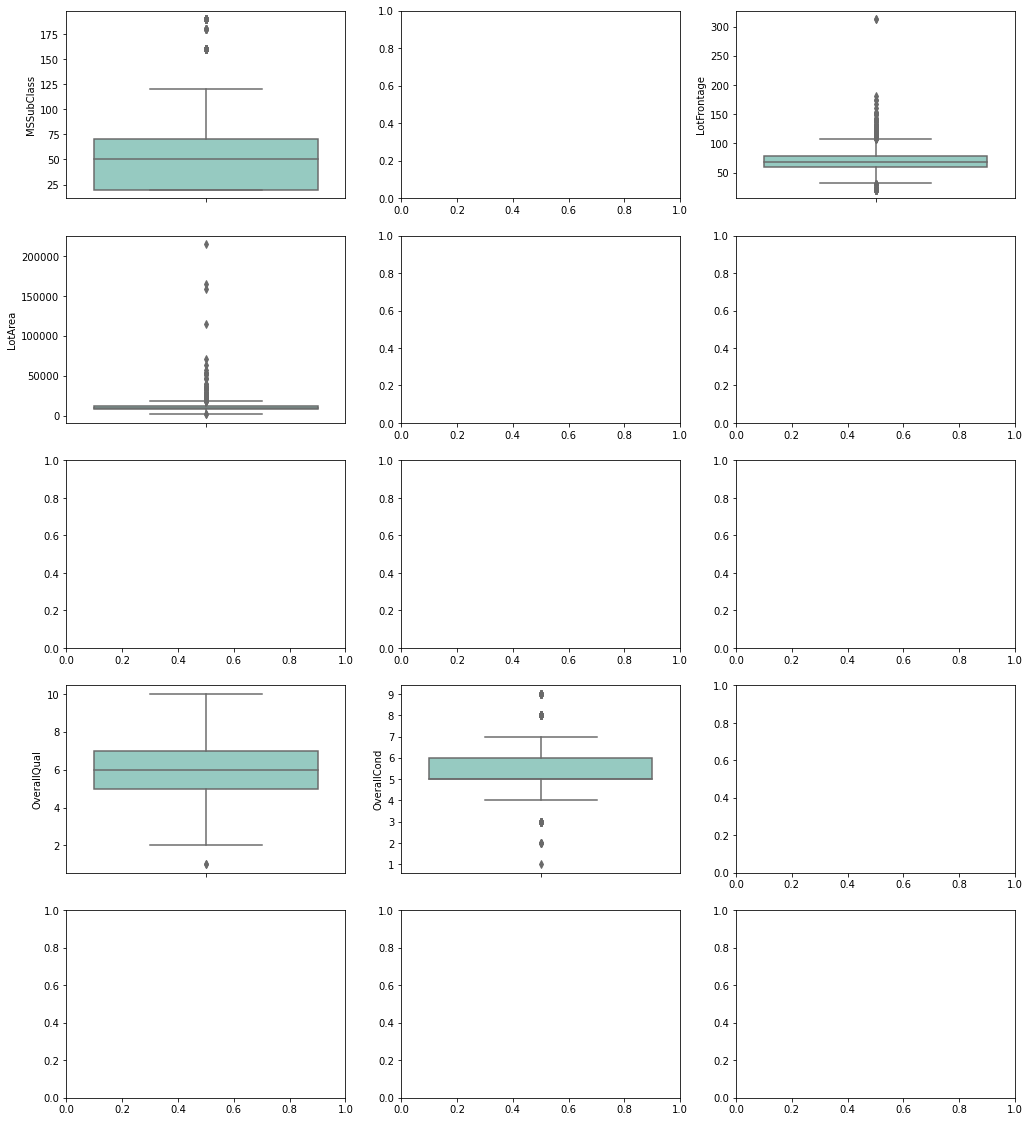

In [30]:
plt.figure(figsize=(17, 20))
for i, col in enumerate(df.columns):
  try:
    plt.subplot(5,3,i+1)
    sns.boxplot(y = col, palette='Set3', data = df)
  except Exception as error:
    pass
# column types for cont. data : select_dtypes, sk_learn.imputer
plt.show()

In [31]:
# Removing Outliers

# Removing values over 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values over 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values over 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values over 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values over 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

### Step 4 Data Visualization

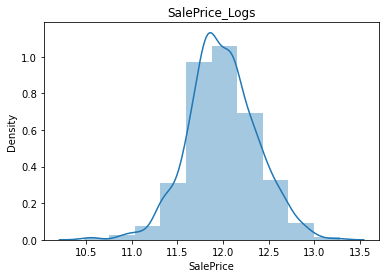

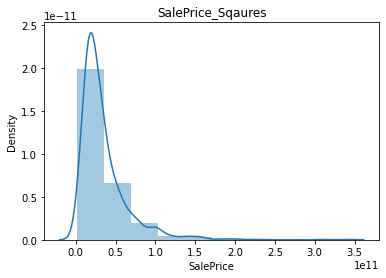

In [32]:
# Target Variable Analysis with logs and squares

plt.title('SalePrice_Logs')
sns.distplot(np.log1p(df['SalePrice']), bins=10)
plt.show()

plt.title('SalePrice_Sqaures')
sns.distplot(df['SalePrice'].pow(2), bins=10)
plt.show()

**Here we can see that Saleprice when on log scale tends to distrubute in Normal Distrubution**

In [33]:
# df['SalePrice'] =np.log1p(df['SalePrice'])

<Figure size 720x360 with 0 Axes>

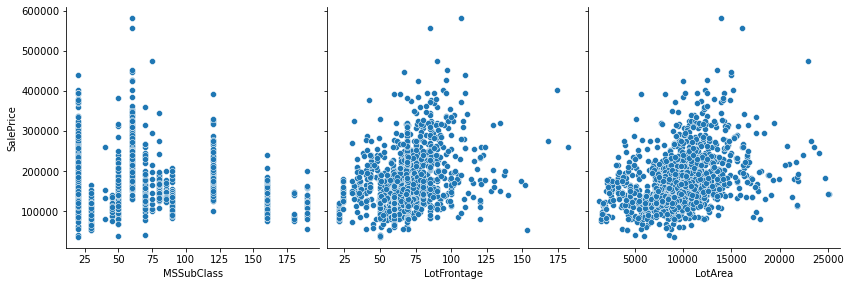

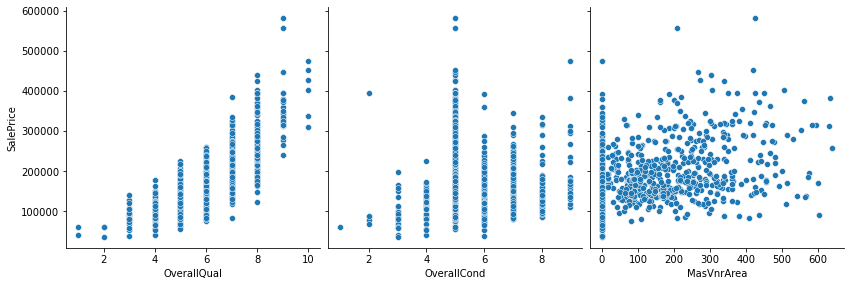

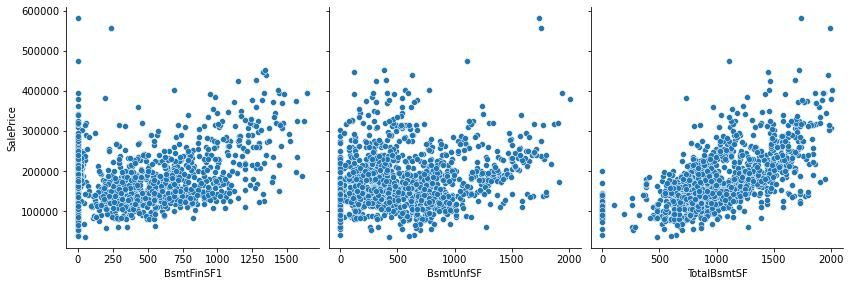

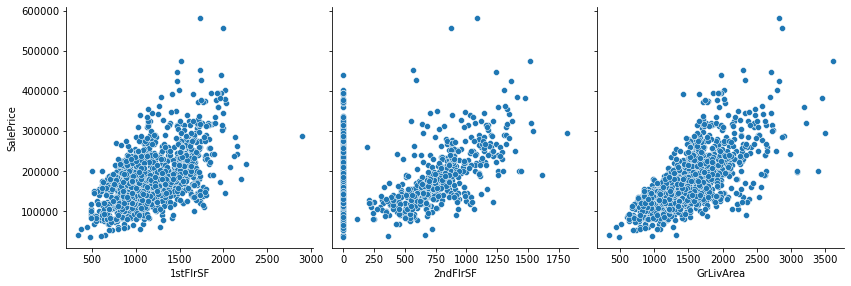

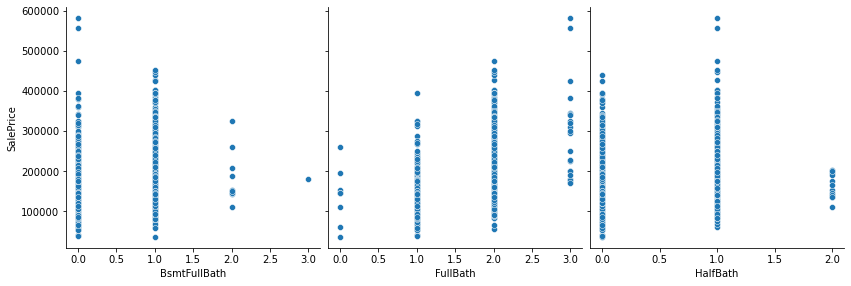

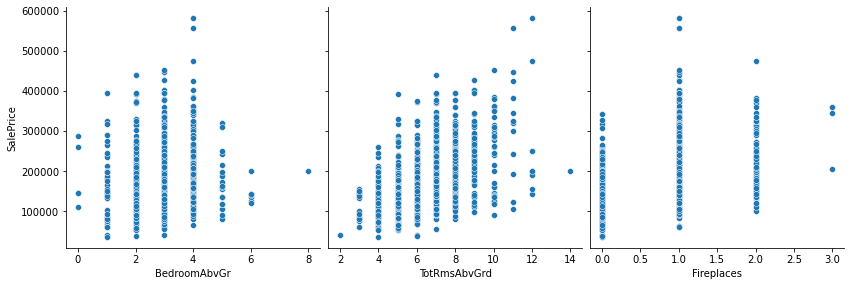

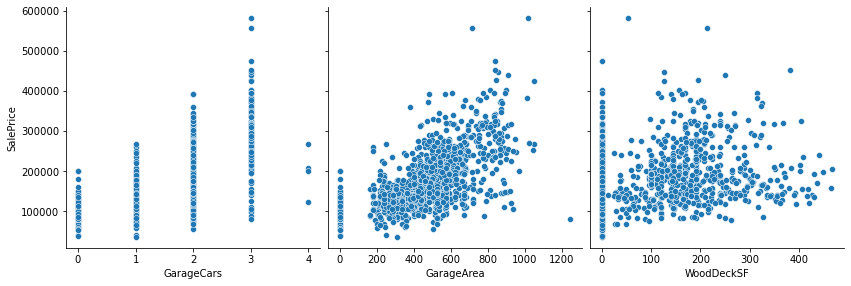

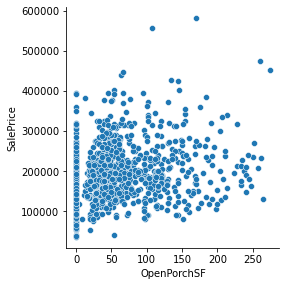

In [34]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Here, Most of the features which are correlated to the Y Variable seems to have linear relationship.

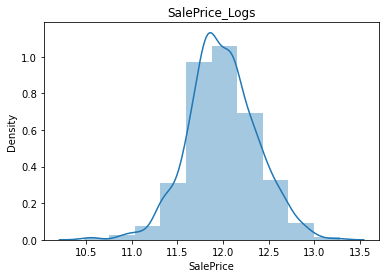

In [36]:
# Target Variable Analysis with logs and squares

plt.title('SalePrice_Logs')
sns.distplot(np.log1p(df['SalePrice']), bins=10)
plt.show()

In [37]:
df.dtypes[0]

dtype('int64')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

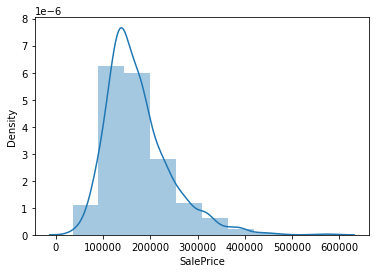

In [38]:
sns.distplot(df['SalePrice'], bins=10)

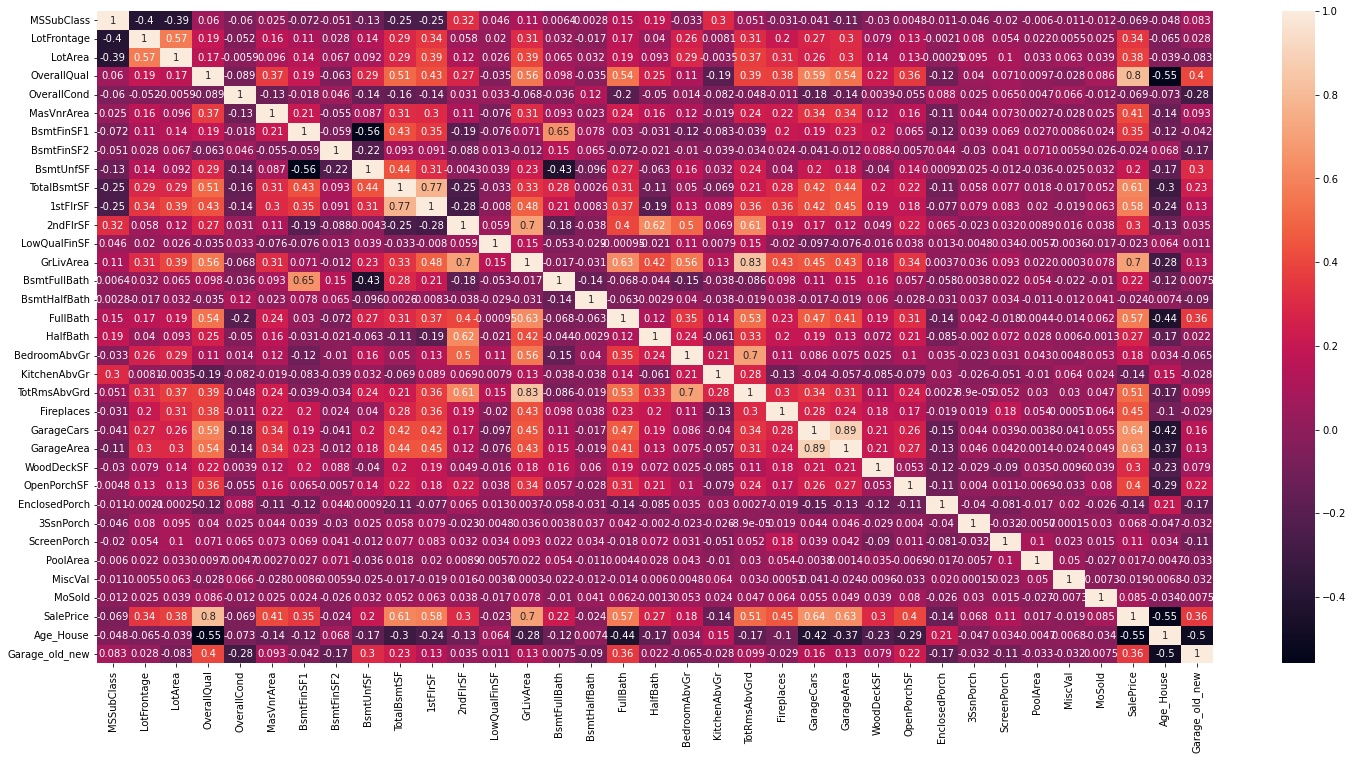

In [39]:
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Step 5: Data Preparation

In [40]:
# Droping values which are highly co-related i.e above 0.8 or less than -0.8
df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [41]:
# Creating Dummy Variable for categorical data
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,6,5,4,0,2,1,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,5,3,3,2,1,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,6,5,4,3,2,1,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,5,4,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,6,5,4,3,2,1,4,2,1,1


In [42]:
df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,6,5,4,0,2,1,4,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,5,3,3,2,1,1,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,6,5,4,3,2,1,4,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,5,4,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,6,5,4,3,2,1,4,2,1,1


In [43]:
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)


d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)


d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)


d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)


d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)


d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [44]:
# drop the below columns since we have created its dummies
df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# Train Test Split
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [46]:
# Scaling the data into standard Scaling to keep the standard variation and handle large distribution
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
# scaler = StandardScaler()
# scaler.fit(X)
     

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Step 6: RFE and Model Creation


In [48]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [49]:
#Simple Linear Regression and RFE with top 30 ranking features
lm = LinearRegression()
# lm.fit(X_train, y_train)
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
# y_pred = lm.predict(X_train)
# r_squared = r2_score(y_train, y_pred)
# r_squared

In [51]:
# y_pred = lm.predict(X_test)
# r_squared = r2_score(y_test, y_pred)
# r_squared

In [52]:
# residual = y_test - y_pred
# plt.scatter( y_pred , residual)
# plt.axhline(y=0, color='r', linestyle=':')
# plt.xlabel("Predicted Distance (metres)")
# plt.ylabel("Residual")
# plt.show()

In [53]:
# p = sns.distplot(residual,kde=True)
# p = plt.title('Normality of error terms/residuals')
# plt.xlabel("Residual")
# plt.show()

In [54]:
rfe = RFE(estimator=lm, n_features_to_select=30)

# rfe = rfe.fit(X_train, y_train)
rfe = rfe.fit(X_train, y_train)

In [55]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=119)

In [56]:
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.ranking_)), columns=['Variable', 'rfe_ranking'])
temp_df.reset_index(drop=True, inplace=True)

temp_df.sort_values('rfe_ranking').head(30)

,Variable,rfe_ranking
118,GarageType_None,1
90,Exterior1st_VinylSd,1
26,ScreenPorch,1
91,Exterior1st_Wd Sdng,1
83,Exterior1st_CemntBd,1
33,d_ExterQual,1
35,d_BsmtExposure,1
38,d_KitchenQual,1
41,d_BldgType,1
22,WoodDeckSF,1


In [57]:
# Using top 30 Columns to build a model for Grid Search
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [58]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [59]:
#Simple Linear Regression and RFE with top 30 ranking features
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = lm.predict(X_train)
r_squared_train_lr = r2_score(y_train, y_pred)
r_squared_train_lr

0.8922860362101606

In [61]:
y_pred = lm.predict(X_test)
r_squared_test_lr = r2_score(y_test, y_pred)
r_squared_test_lr

0.8695340365497257

In [62]:
# Metrics to assess model performance
rss_lr = np.sum(np.square(y_test - y_pred))
print(rss_lr)
mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)
rmse_lr = mse_lr**0.5
# Root Mean Squared Error
print(rmse_lr)

229018251599.4256
561319244.1162392
23692.176854739188


In [63]:
res = {"Liner Regression" : [r_squared_train_lr, r_squared_test_lr, rss_lr, mse_lr, rmse_lr, None]}

As we can see, there is slight overfitting in the model, We will reduce it by first using Ridge and later with Lasso Regularization Technique

#### Starting with Ridge Regression


In [64]:
params = {'alpha': [1, 10, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 60.05,60.1, 60.2, 60.5, 61, 62, 63, 64, 66, 68, 70, 72, 74, 75]}

# params = {'alpha': [0.00001, 0.0000001, 0.5, 1]}


ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 51, 52, 53, 54, 55, 56, 57, 58,
                                   59, 60, 60.05, 60.1, 60.2, 60.5, 61, 62, 63,
                                   64, 66, 68, 70, 72, 74, 75]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
ridge_model_cv.best_estimator_

Ridge(alpha=60)

In [66]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
ridge_cv_results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,60,-16056.916821,-16582.453893,1
13,60.05,-16056.987309,-16582.455945,2
14,60.1,-16057.057706,-16582.457926,3
15,60.2,-16057.198226,-16582.461670,4
16,60.5,-16057.617611,-16582.471183,5
11,59,-16055.505072,-16582.477804,6
18,62,-16059.846245,-16582.480647,7
17,61,-16058.341866,-16582.481345,8
19,63,-16061.376566,-16582.592114,9
10,58,-16054.183359,-16582.693377,10


In [67]:
ridge = Ridge(alpha=(ridge_model_cv.best_estimator_.alpha))

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4866.48068736, 13173.42827339,  4256.42585853,  3285.83691214,
        8015.34607859,  5800.34492025, 20303.46887245, -1875.42693687,
        8911.28859975,  3095.85722911,  3597.92729897,  6983.55776173,
        4629.47017923,  4830.1598629 , -6300.44794289,  3733.71957473,
        5255.94154715,  8164.82304865, -3284.8070747 ,  4244.73576661,
        -244.2997586 ,  3140.66031778, -1418.28849167, -5528.31694558,
        3264.78981734, -3530.66685078,  3277.63361617,  3381.92604737,
        4101.99042328,  2763.84282904])

In [68]:
mean_squared_error(y_test, ridge.predict(X_test))

538172394.9366307

In [69]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,4866.4807
1,OverallQual,13173.4283
2,OverallCond,4256.4259
3,MasVnrArea,3285.8369
4,BsmtFinSF1,8015.3461
5,TotalBsmtSF,5800.3449
6,GrLivArea,20303.4689
7,BedroomAbvGr,-1875.4269
8,GarageCars,8911.2886
9,WoodDeckSF,3095.8572


In [70]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [71]:
# Method to get the coefficient values
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(15)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,20303.4689
0,OverallQual,True,1,13173.4283
4,GarageCars,True,1,8911.2886
10,Neighborhood_NridgHt,True,1,8164.8230
1,BsmtFinSF1,True,1,8015.3461
5,d_ExterQual,True,1,6983.5578
2,TotalBsmtSF,True,1,5800.3449
9,Neighborhood_Crawfor,True,1,5255.9415
7,d_KitchenQual,True,1,4830.1599
6,d_BsmtExposure,True,1,4629.4702


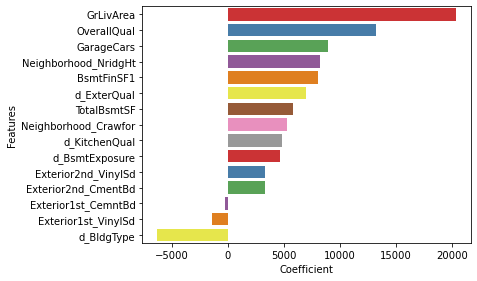

In [72]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [73]:
X_train_ridge = X_train[ridge_df.Features]
y_pred = lm.predict(X_train_ridge)
r_squared_train_ridge = r2_score(y_train, y_pred)
r_squared_train_ridge

0.8922860362101606

In [74]:
X_test_ridge = X_test[ridge_df.Features]
y_pred = lm.predict(X_test_ridge)
r_squared_test_ridge = r2_score(y_test, y_pred)
r_squared_test_ridge

0.8695340365497257

In [75]:
# Metrics to assess model performance
rss_ridge = np.sum(np.square(y_test - y_pred))
print(rss_ridge)
mse_ridge = mean_squared_error(y_test, y_pred)
print(mse_ridge)
rmse_ridge = mse_ridge**0.5
# Root Mean Squared Error
print(rmse_ridge)

229018251599.4256
561319244.1162392
23692.176854739188


In [76]:
res.update({"Ridge" : [r_squared_train_ridge, r_squared_test_ridge, rss_ridge, mse_ridge, rmse_ridge, ridge_model_cv.best_estimator_.alpha]})

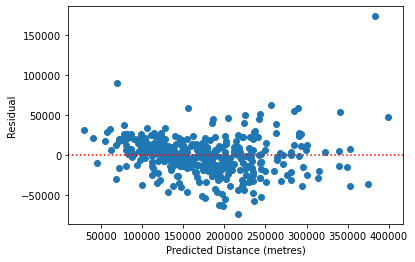

In [77]:
residual = y_test - y_pred
plt.scatter( y_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

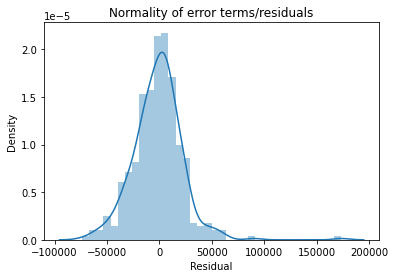

In [78]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Building LassoRegression Model

In [79]:
# X_train = X_train.drop(columns=['GrLivArea',
#  'OverallQual',
#  'Exterior2nd_CmentBd',
#  'GarageCars',
#  'Neighborhood_NridgHt'], axis=1)

In [80]:
X_train.shape

(950, 30)

In [81]:
lasso = Lasso()

# params = {'alpha': [(x/10000) for x in range(10,15)]}
params = {'alpha': [1, 1.15, 1.12, 1.1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 100, 500, 600, 750, 1000, 50, 0.1, 0.04, 0.001, 0.0001, 0.00001]}
# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 1.15, 1.12, 1.1, 1.5, 2, 2.5, 3, 3.5, 4,
                                   5, 10, 100, 500, 600, 750, 1000, 50, 0.1,
                                   0.04, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(10)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,1.1,-15976.850456,-16647.987292,1
2,1.12,-15976.856342,-16647.998121,2
1,1.15,-15976.865287,-16648.014538,3
4,1.5,-15976.970023,-16648.202500,4
5,2,-15977.119905,-16648.470451,5
6,2.5,-15977.268090,-16648.739311,6
7,3,-15977.420319,-16649.010160,7
8,3.5,-15977.569572,-16649.285084,8
9,4,-15977.720571,-16649.556143,9
10,5,-15978.022547,-16650.099814,10


In [83]:
lasso_model_cv.best_estimator_

Lasso(alpha=1.1)

In [84]:
# X_train = X_train.drop(columns=list(temp2_df['Features'].head()), axis=1)

In [85]:
# check the coefficient values optimized lambda

alpha = lasso_model_cv.best_estimator_.alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 4078.34026521, 13184.21168285,  4610.97688492,  3029.86250625,
        8392.51242462,  5310.01466902, 22932.96426188, -3373.12600805,
        9503.8401571 ,  3178.07914743,  3681.12989658,  6529.94340427,
        4668.89059466,  4124.19220566, -7168.16145001,  4113.70320513,
        5469.11857257,  9036.14832993, -3713.03883385,  4676.02533146,
       -8089.15625629,  3484.54999528, -8608.7652745 , -8151.50980737,
       10853.99315078, -4213.16717394, 10418.56780445,  5797.29128635,
        3962.99493494,  3564.02644387])

In [86]:
# X_test = X_test.drop(columns=['GrLivArea',
#  'OverallQual',
#  'Exterior2nd_CmentBd',
#  'GarageCars',
#  'Neighborhood_NridgHt'], axis=1)

In [87]:
mean_squared_error(y_test, lasso.predict(X_test))

561169194.8946332

In [88]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,4078.3403
1,OverallQual,13184.2117
2,OverallCond,4610.9769
3,MasVnrArea,3029.8625
4,BsmtFinSF1,8392.5124
5,TotalBsmtSF,5310.0147
6,GrLivArea,22932.9643
7,BedroomAbvGr,-3373.1260
8,GarageCars,9503.8402
9,WoodDeckSF,3178.0791


In [89]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [90]:
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,GrLivArea,True,1,22932.964262
0,OverallQual,True,1,13184.211683
9,Exterior2nd_CmentBd,True,1,10853.993151
3,GarageCars,True,1,9503.840157
7,Neighborhood_NridgHt,True,1,9036.148330
1,BsmtFinSF1,True,1,8392.512425
4,d_ExterQual,True,1,6529.943404
5,d_BsmtExposure,True,1,4668.890595
6,d_BldgType,True,1,-7168.161450
8,Exterior1st_CemntBd,True,1,-8089.156256


In [91]:
# list(temp2_df['Features'].head())

In [92]:
# list(temp1_df['Features'].head())

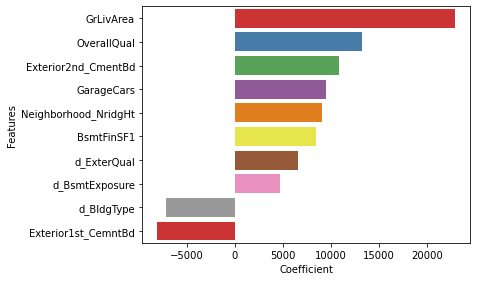

In [93]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [94]:
# temp2_df['Features'].values

In [95]:
y_pred = lasso.predict(X_train)
r_squared_train_lasso = r2_score(y_train, y_pred)
r_squared_train_lasso

0.8922859590591992

In [96]:
y_pred = lasso.predict(X_test)
r_squared_test_lasso = r2_score(y_test, y_pred)
r_squared_test_lasso

0.8695689120977619

In [97]:
# Metrics to assess model performance
rss_lasso = np.sum(np.square(y_test - y_pred))
print(rss_lasso)
mse_lasso = mean_squared_error(y_test, y_pred)
print(mse_lasso)
rmse_lasso = mse_lasso**0.5
# Root Mean Squared Error
print(rmse_lasso)

228957031517.0103
561169194.8946332
23689.01000241743


In [98]:
res.update({"Lasso" : [r_squared_train_lasso, r_squared_test_lasso, rss_lasso, mse_lasso, rmse_lasso, lasso_model_cv.best_estimator_.alpha]})

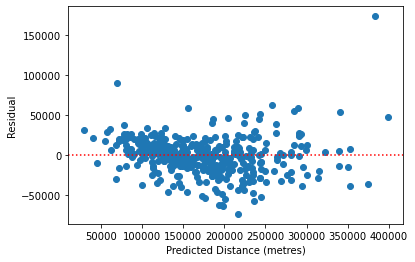

In [99]:
residual = y_test - y_pred
plt.scatter( y_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

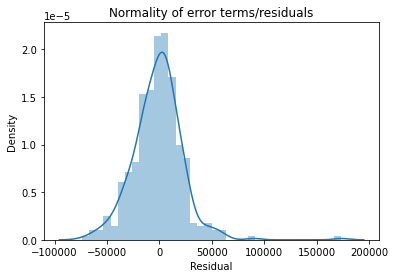

In [100]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

### Step 7. Conclusions And Results

In [101]:
result = pd.DataFrame(res).T
result.columns =['R2_Train', 'R2_Test', 'RSS', 'MSE', 'RSME', 'Alpha']

In [102]:
result

,R2_Train,R2_Test,RSS,MSE,RSME,Alpha
Liner Regression,0.892286,0.869534,2.290183e+11,5.613192e+08,23692.176855,NaN
Ridge,0.892286,0.869534,2.290183e+11,5.613192e+08,23692.176855,60.0
Lasso,0.892286,0.869569,2.289570e+11,5.611692e+08,23689.010002,1.1


## As we can see, there is a slight increase in RSME for Lasso Model. Here with regulaization, we can ensure that there is no overfitting of data.